In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
n_inputs = 3
n_hidden1 = 50
n_hidden2 = 20
n_hidden3 = 10
n_outputs = 1

In [3]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None))

In [4]:
hidden1 = tf.contrib.layers.fully_connected(X, n_hidden1, activation_fn=tf.nn.relu)
hidden2 = tf.contrib.layers.fully_connected(hidden1, n_hidden2, activation_fn=tf.nn.relu)
hidden3 = tf.contrib.layers.fully_connected(hidden2, n_hidden3, activation_fn=tf.nn.relu)
output = tf.contrib.layers.fully_connected(hidden3, n_outputs, activation_fn=None)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
with tf.name_scope('loss'):
    loss = tf.losses.mean_squared_error(y, output)

Instructions for updating:
Use tf.cast instead.


In [6]:
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:
Use tf.cast instead.


# Execution 

In [7]:
init = tf.global_variables_initializer()

In [8]:
def gradient(x):
    gradients = []
#     grad = -np.sin(x) #derivative of sine
    grad = np.square((1 / np.cos(x)))
    for elem in grad:
        if elem > 0:
            gradients.append(1)
        else:
            gradients.append(0)
    return gradients

40.814533
14.027619
15.775891
10.782426
34.17783
70.93102
14.406419
18.491165
17.081629
24.128597


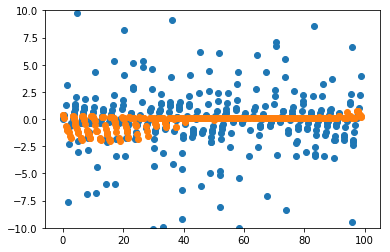

In [9]:
#train nn on range 50-75 and test on range 0-100
n_epochs = 100000

with tf.Session() as sess:
    sess.run(init)
    for epoch in range (0, n_epochs):
        
        period = np.pi
#         period = 2 * np.pi
        
#         value = np.random.rand(400, 1) * 15 #domain 0, 15
        value = np.random.uniform(40, 75, (400, 1))
        label = np.tan(value)
        cycle = value / period #value / period of sine function
        value_no_cycle = value % period #value % period of sine
        
        gradients = gradient(value)
        
        values = np.column_stack((cycle, value_no_cycle, gradients))
        
        sess.run(optimizer, feed_dict={X:values, y: label})
        if epoch % 10000 == 0:
            acc = loss.eval(feed_dict={X:values, y: label})
            print(np.sqrt(acc))
    #final predictions and graph plot
    values_test = np.random.rand(400, 1) * 100
#     value = np.random.uniform(50, 75, (400, 1))
    actual_test = np.tan(values_test)
    
    
    cycle_test = values_test / period
    value_no_cycle_test = values_test % period
    
    gradients_test = gradient(values_test)
    
    values_combined = np.column_stack((cycle_test, value_no_cycle_test, gradients_test))
    
    predictions = output.eval(feed_dict={X: values_combined})
    plt.scatter(values_test, actual_test)
    plt.scatter(values_test, predictions)
    plt.ylim(-10, 10)
    plt.show()

0.95081043
0.004142672
0.0041781603
0.004009423
0.006184637
0.007225362
0.0046715923
0.005016563
0.004226449
0.0022164246


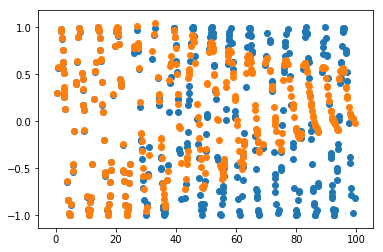

In [10]:
#train nn on range 0-25 and test on range 0-100
n_epochs = 60000

with tf.Session() as sess:
    sess.run(init)
    for epoch in range (0, n_epochs):
        
#         period = np.pi
        period = 2 * np.pi
        
        value = np.random.rand(400, 1) * 25 #domain 0, 25
#         value = np.random.uniform(50, 75, (400, 1))
        label = np.sin(value)
        cycle = value / period #value / period of sine function
        value_no_cycle = value % period #value % period of sine
        
        gradients = gradient(value)
        
        values = np.column_stack((cycle, value_no_cycle, gradients))
        
        sess.run(optimizer, feed_dict={X:values, y: label})
        if epoch % 6000 == 0:
            acc = loss.eval(feed_dict={X:values, y: label})
            print(np.sqrt(acc))
    #final predictions and graph plot
    values_test = np.random.rand(400, 1) * 100
#     value = np.random.uniform(50, 75, (400, 1))
    actual_test = np.sin(values_test)
    
    
    cycle_test = values_test / period
    value_no_cycle_test = values_test % period
    
    gradients_test = gradient(values_test)
    
    values_combined = np.column_stack((cycle_test, value_no_cycle_test, gradients_test))
    
    predictions = output.eval(feed_dict={X: values_combined})
    plt.scatter(values_test, actual_test)
    plt.scatter(values_test, predictions)
